# Summary

 - Accuracy too low (at most 80%)
 - CatBoost overall best regressor for the data

# Data Processing and EDA

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from datetime import timedelta

In [14]:
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['figure.titlesize'] = 28
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.title_fontsize'] = 20

In [ ]:
#from cycler import cycler
#plt.style.use('dark_background')
#plt.style.use('dark_background')
#mpl.rcParams['axes.prop_cycle'] = cycler(color=['teal', 'magenta', 'yellow'])

In [15]:
CUTOFF_TRAIN = '2018-07-15'  # ~80%
CUTOFF_TRAINVAL = '2018-10-01' # ~ 80%

df = pd.read_excel('StockX-Data-Contest-2019-3.xlsx', sheet_name='Raw Data')
df['Sneaker Name'] = df['Brand'] + ' - ' + df['Sneaker Name']
df['DaysStored'] = pd.Series(df['Order Date'] - df['Release Date']).apply(lambda x: x.days)
df = df[['Order Date', 'Sneaker Name', 'Shoe Size', 'Sale Price', 'DaysStored']]
df

,Order Date,Sneaker Name,Shoe Size,Sale Price,DaysStored
0,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-Low-V2-Beluga,11.0,1097.0,342
1,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-...,11.0,685.0,282
2,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-...,11.0,690.0,282
3,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-Red,11.5,1075.0,282
4,2017-09-01,Yeezy - Adidas-Yeezy-Boost-350-V2-Core-Black-...,11.0,828.0,202
...,...,...,...,...,...
99951,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,8.0,565.0,49
99952,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,8.5,598.0,49
99953,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,5.5,605.0,49
99954,2019-02-13,Yeezy - adidas-Yeezy-Boost-350-V2-Static-Refl...,11.0,650.0,49


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Sneaker Name  99956 non-null  object        
 2   Shoe Size     99956 non-null  float64       
 3   Sale Price    99956 non-null  float64       
 4   DaysStored    99956 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 3.8+ MB


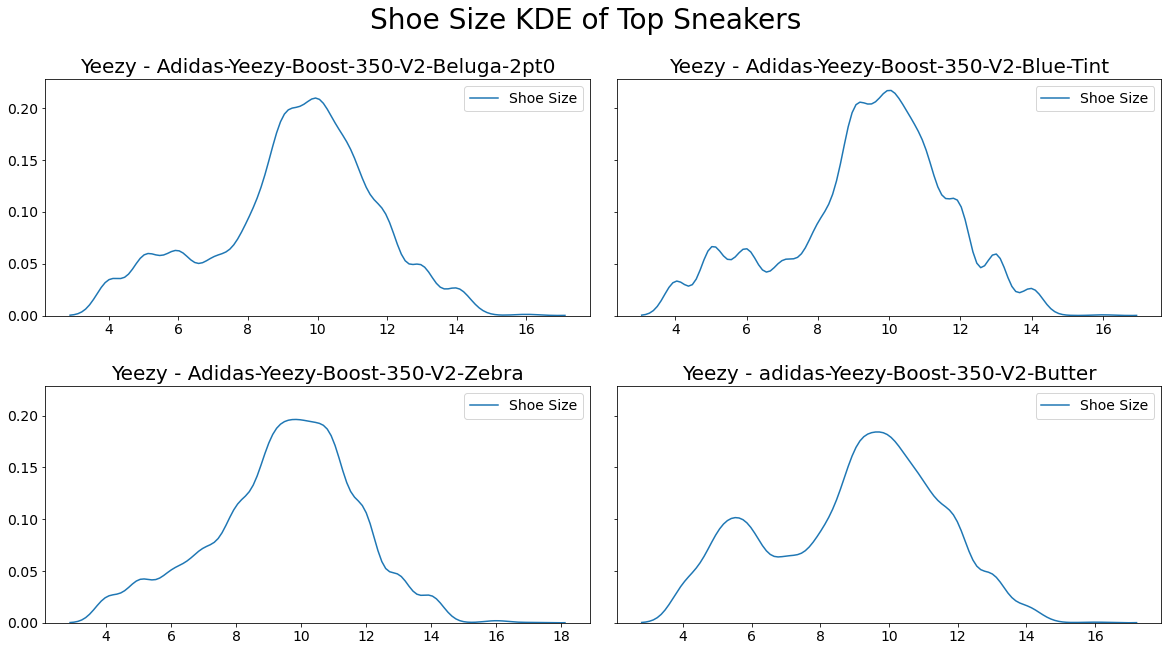

In [17]:
top_sneakers = df.groupby(['Sneaker Name', 'Shoe Size']).size().reset_index().nlargest(9, 0)['Sneaker Name'].to_list()
top_sneakers = sorted(list(set(top_sneakers)))

fig, ax = plt.subplots(2, 2, figsize=(20,10), sharey = True)
fig.subplots_adjust(hspace=0.3, wspace=0.05)
fig.suptitle('Shoe Size KDE of Top Sneakers')

x, y = 0, 0
for i in range(0, len(top_sneakers)):
    x, y = int(i/2), i % 2
    sns.kdeplot(data=df[df['Sneaker Name']==top_sneakers[i]]['Shoe Size'], ax=ax[x][y])
    ax[x][y].set_title(top_sneakers[i].strip(), fontsize=20)

## Filter to single Sneaker Name

In [18]:
top_sneakers

[' Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0',
 ' Yeezy - Adidas-Yeezy-Boost-350-V2-Blue-Tint',
 ' Yeezy - Adidas-Yeezy-Boost-350-V2-Zebra',
 ' Yeezy - adidas-Yeezy-Boost-350-V2-Butter']

In [19]:
sneaker_name = ' Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0'
df_agg = df[(df['Sneaker Name']==sneaker_name) & \
            (df['Shoe Size'].isin([10]))].copy()
df_agg = df_agg.groupby(['Order Date', 'Sneaker Name', 'Shoe Size']).mean().reset_index()
df_agg

,Order Date,Sneaker Name,Shoe Size,Sale Price,DaysStored
0,2017-11-17,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10.0,614.0,-8
1,2017-11-19,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10.0,605.0,-6
2,2017-11-20,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10.0,550.0,-5
3,2017-11-21,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10.0,532.5,-4
4,2017-11-22,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10.0,499.5,-3
...,...,...,...,...,...
335,2019-02-06,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10.0,413.0,438
336,2019-02-07,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10.0,408.0,439
337,2019-02-08,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10.0,435.0,440
338,2019-02-11,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10.0,440.0,443


In [20]:
start_dt = df_agg['Order Date'].min()
end_dt = df_agg['Order Date'].max()

df_cal = pd.DataFrame({'dt': pd.date_range(start_dt, end_dt)})
df_cal['dt_str'] = df_cal['dt'].apply(lambda x: x.strftime('%Y-%m-%d'))

df_cal['lst_lb15'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(15 - 1)).strftime('%Y-%m-%d').to_list())
df_cal['lst_lb30'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(30 - 1)).strftime('%Y-%m-%d').to_list())
df_cal['lst_lb60'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(60 - 1)).strftime('%Y-%m-%d').to_list())
df_cal['lst_lb120'] = df_cal['dt'].apply(lambda x: pd.date_range(x, x + timedelta(120 - 1)).strftime('%Y-%m-%d').to_list())

df_cal['lbl15_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(15 - 1)).strftime('%Y-%m-%d'))
df_cal['lbl30_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(30 - 1)).strftime('%Y-%m-%d'))
df_cal['lbl60_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(60 - 1)).strftime('%Y-%m-%d'))
df_cal['lbl120_last'] = df_cal['dt'].apply(lambda x: (x + timedelta(120 - 1)).strftime('%Y-%m-%d'))

df_cal['lb15_plus7'] = df_cal['dt'].apply(lambda x: (x + timedelta(22)).strftime('%Y-%m-%d'))
df_cal['lb30_plus7'] = df_cal['dt'].apply(lambda x: (x + timedelta(37)).strftime('%Y-%m-%d'))
df_cal['lb60_plus7'] = df_cal['dt'].apply(lambda x: (x + timedelta(67)).strftime('%Y-%m-%d'))
df_cal['lb120_plus7'] = df_cal['dt'].apply(lambda x: (x + timedelta(127)).strftime('%Y-%m-%d'))

print(df_cal.shape, df_cal.columns)
df_cal.head(5)

(454, 14) Index(['dt', 'dt_str', 'lst_lb15', 'lst_lb30', 'lst_lb60', 'lst_lb120',
       'lbl15_last', 'lbl30_last', 'lbl60_last', 'lbl120_last', 'lb15_plus7',
       'lb30_plus7', 'lb60_plus7', 'lb120_plus7'],
      dtype='object')


,dt,dt_str,lst_lb15,lst_lb30,lst_lb60,lst_lb120,lbl15_last,lbl30_last,lbl60_last,lbl120_last,lb15_plus7,lb30_plus7,lb60_plus7,lb120_plus7
0,2017-11-17,2017-11-17,"[2017-11-17, 2017-11-18, 2017-11-19, 2017-11-2...","[2017-11-17, 2017-11-18, 2017-11-19, 2017-11-2...","[2017-11-17, 2017-11-18, 2017-11-19, 2017-11-2...","[2017-11-17, 2017-11-18, 2017-11-19, 2017-11-2...",2017-12-01,2017-12-16,2018-01-15,2018-03-16,2017-12-09,2017-12-24,2018-01-23,2018-03-24
1,2017-11-18,2017-11-18,"[2017-11-18, 2017-11-19, 2017-11-20, 2017-11-2...","[2017-11-18, 2017-11-19, 2017-11-20, 2017-11-2...","[2017-11-18, 2017-11-19, 2017-11-20, 2017-11-2...","[2017-11-18, 2017-11-19, 2017-11-20, 2017-11-2...",2017-12-02,2017-12-17,2018-01-16,2018-03-17,2017-12-10,2017-12-25,2018-01-24,2018-03-25
2,2017-11-19,2017-11-19,"[2017-11-19, 2017-11-20, 2017-11-21, 2017-11-2...","[2017-11-19, 2017-11-20, 2017-11-21, 2017-11-2...","[2017-11-19, 2017-11-20, 2017-11-21, 2017-11-2...","[2017-11-19, 2017-11-20, 2017-11-21, 2017-11-2...",2017-12-03,2017-12-18,2018-01-17,2018-03-18,2017-12-11,2017-12-26,2018-01-25,2018-03-26
3,2017-11-20,2017-11-20,"[2017-11-20, 2017-11-21, 2017-11-22, 2017-11-2...","[2017-11-20, 2017-11-21, 2017-11-22, 2017-11-2...","[2017-11-20, 2017-11-21, 2017-11-22, 2017-11-2...","[2017-11-20, 2017-11-21, 2017-11-22, 2017-11-2...",2017-12-04,2017-12-19,2018-01-18,2018-03-19,2017-12-12,2017-12-27,2018-01-26,2018-03-27
4,2017-11-21,2017-11-21,"[2017-11-21, 2017-11-22, 2017-11-23, 2017-11-2...","[2017-11-21, 2017-11-22, 2017-11-23, 2017-11-2...","[2017-11-21, 2017-11-22, 2017-11-23, 2017-11-2...","[2017-11-21, 2017-11-22, 2017-11-23, 2017-11-2...",2017-12-05,2017-12-20,2018-01-19,2018-03-20,2017-12-13,2017-12-28,2018-01-27,2018-03-28


In [25]:
df_tmp = df_cal[['dt', 'dt_str']].copy()
df_tmp['key'] = 0
print('df_tmp.shape', df_tmp.shape)

df_tmp = df_tmp.merge(pd.DataFrame({'key': [0], 'Sneaker Name': [sneaker_name]}), how='outer')
df_tmp = df_tmp.merge(pd.DataFrame({'key': [0, 0, 0], 'Shoe Size': [9, 10, 11]}), how='outer')
df_tmp = df_tmp.merge(df_agg, how='left', left_on=['dt', 'Sneaker Name', 'Shoe Size'], right_on=['Order Date', 'Sneaker Name', 'Shoe Size'])
df_tmp = df_tmp[['dt_str', 'Sneaker Name', 'Shoe Size', 'Sale Price', 'DaysStored']]
print('df_tmp.shape', df_tmp.shape)
df_tmp.head(5)

df_tmp.shape (454, 3)
df_tmp.shape (1362, 5)


,dt_str,Sneaker Name,Shoe Size,Sale Price,DaysStored
0,2017-11-17,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,9,NaN,NaN
1,2017-11-17,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10,614.0,-8.0
2,2017-11-17,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,11,NaN,NaN
3,2017-11-18,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,9,NaN,NaN
4,2017-11-18,Yeezy - Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10,NaN,NaN


In [26]:
pvt_price = df_tmp[['dt_str', 'Shoe Size', 'Sale Price']].copy()
pvt_price = pvt_price.pivot(index='Shoe Size', columns='dt_str', values='Sale Price')
pvt_price = pvt_price.interpolate(method='pad', axis=0, limit_direction='forward')
print('pvt_price.shape', pvt_price.shape)

pvt_price_diff = pvt_price.diff(axis=1)
pvt_price_diff = pvt_price_diff.reset_index()
pvt_price = pvt_price.reset_index()
print(pvt_price['Shoe Size'])

pvt_store = df_tmp[['dt_str', 'Shoe Size', 'DaysStored']].copy()
pvt_store = pvt_store.pivot(index='Shoe Size', columns='dt_str', values='DaysStored')
pvt_store = pvt_store.interpolate(method='linear', axis=0, limit_direction='both')
pvt_store = pvt_store.interpolate(method='linear', axis=1, limit_direction='both')  # fill remaining nulls
print('pvt_store.shape', pvt_store.shape)
pvt_store = pvt_store.reset_index()
print(pvt_store['Shoe Size'])

pvt_price.shape (3, 454)
0     9
1    10
2    11
Name: Shoe Size, dtype: int64
pvt_store.shape (3, 454)
0     9
1    10
2    11
Name: Shoe Size, dtype: int64


In [27]:
pvt_price

dt_str,Shoe Size,2017-11-17,2017-11-18,2017-11-19,2017-11-20,2017-11-21,2017-11-22,2017-11-23,2017-11-24,2017-11-25,...,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-09,2019-02-10,2019-02-11,2019-02-12,2019-02-13
0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,614.0,614.0,605.0,550.0,532.5,499.5,486.5,442.83871,430.0,...,445.0,422.0,413.0,408.0,435.0,435.0,435.0,440.0,440.0,450.0
2,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
pvt_price_diff

dt_str,Shoe Size,2017-11-17,2017-11-18,2017-11-19,2017-11-20,2017-11-21,2017-11-22,2017-11-23,2017-11-24,2017-11-25,...,2019-02-04,2019-02-05,2019-02-06,2019-02-07,2019-02-08,2019-02-09,2019-02-10,2019-02-11,2019-02-12,2019-02-13
0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,NaN,0.0,-9.0,-55.0,-17.5,-33.0,-13.0,-43.66129,-12.83871,...,17.5,-23.0,-9.0,-5.0,27.0,0.0,0.0,5.0,0.0,10.0
2,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_results = pd.DataFrame({'scenario': pd.Series([], dtype=str),
                           'model': pd.Series([], dtype=str),
                           'MAE': pd.Series([], dtype=np.half),
                           'MSE': pd.Series([], dtype=np.half),
                           'RMSE': pd.Series([], dtype=np.half),
                           'R2': pd.Series([], dtype=np.half),
                           'RMSLE': pd.Series([], dtype=np.half),
                           'MAPE': pd.Series([], dtype=np.half)})
df_results

,scenario,model,MAE,MSE,RMSE,R2,RMSLE,MAPE


# Regression

In [30]:
import pycaret.regression as py15
#import pycaret.regression as py30
#import pycaret.regression as py60
#import pycaret.regression as py120


## Models List

In [31]:
py15.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


## Price (As Is), Days Stored (First Order, Predict)

### 15-day Lookbehind

In [32]:
train_win15 = df_cal[(df_cal['lb15_plus7'] < CUTOFF_TRAINVAL)][['dt_str', 'lst_lb15', 'lb15_plus7']]
train_win15['label'] = train_win15['lb15_plus7'].apply(lambda x: pvt_price[['Shoe Size']])
train_win15['target'] = train_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'target': pvt_price[x]}))
train_win15['store_frd'] = train_win15['dt_str'].apply(lambda x: pd.DataFrame({'store_frd': pvt_store[x]}))
train_win15['store_prd'] = train_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'store_prd': pvt_store[x]}))
train_win15['feature'] = train_win15['lst_lb15'].apply(lambda x: pvt_price[x])
for row in train_win15['feature']:
    row.columns = np.arange(1, len(row.columns) + 1)

label15 = pd.concat(train_win15['label'].to_list(), axis=0)
label15 = pd.get_dummies(label15['Shoe Size'], prefix='shoe_size')
target15 = pd.concat(train_win15['target'].to_list(), axis=0)
store15_frd = pd.concat(train_win15['store_frd'].to_list(), axis=0)
store15_prd = pd.concat(train_win15['store_prd'].to_list(), axis=0)
feature15 = pd.concat(train_win15['feature'].to_list(), axis=0)

train_win15 = pd.concat([label15, target15, store15_frd, store15_prd, feature15], axis=1)
print(train_win15.shape, train_win15.columns)
train_win15.head(5)


(888, 21) Index([ 'shoe_size_9', 'shoe_size_10', 'shoe_size_11',       'target',
          'store_frd',    'store_prd',              1,              2,
                    3,              4,              5,              6,
                    7,              8,              9,             10,
                   11,             12,             13,             14,
                   15],
      dtype='object')


,shoe_size_9,shoe_size_10,shoe_size_11,target,store_frd,store_prd,1,2,3,4,...,6,7,8,9,10,11,12,13,14,15
0,1,0,0,NaN,-8.0,14.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,0,356.944444,-8.0,14.0,614.0,614.0,605.0,550.0,...,499.5,486.50000,442.83871,430.000000,427.235294,405.843750,401.857143,377.765957,376.387755,380.695652
2,0,0,1,NaN,-8.0,14.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,0,0,NaN,-7.0,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,0,356.045455,-7.0,15.0,614.0,605.0,550.0,532.5,...,486.5,442.83871,430.00000,427.235294,405.843750,401.857143,377.765957,376.387755,380.695652,382.846154


In [33]:
ret = py15.setup(data=train_win15, target='target', train_size=0.80, session_id=123, silent=True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(888, 21)"
4,Missing Values,True
5,Numeric Features,20
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [34]:
py15.compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,4.5105,35.9980,5.9006,0.9035,0.0144,0.0111,0.1417
1,Gradient Boosting Regressor,4.6245,39.1512,6.1456,0.8976,0.0150,0.0114,0.0860
2,Random Forest,4.7514,39.3960,6.2068,0.8957,0.0152,0.0117,0.1538
3,CatBoost Regressor,4.7984,39.9146,6.2494,0.8941,0.0153,0.0118,1.9810
4,K Neighbors Regressor,4.9713,41.1433,6.3299,0.8870,0.0155,0.0122,0.0025
5,Light Gradient Boosting Machine,5.2283,44.1638,6.5965,0.8816,0.0162,0.0129,0.0375
6,AdaBoost Regressor,5.4788,49.2707,6.9641,0.8675,0.0170,0.0135,0.0754
7,Decision Tree,5.3208,54.1799,7.0952,0.8672,0.0174,0.0131,0.0043
8,Extreme Gradient Boosting,5.6737,58.7494,7.5109,0.8470,0.0185,0.0140,0.1519
9,Bayesian Ridge,6.3145,60.0840,7.6847,0.8365,0.0188,0.0156,0.0132


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

In [35]:
py15.compare_models(sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,4.5105,35.9980,5.9006,0.9035,0.0144,0.0111,0.1598
1,Gradient Boosting Regressor,4.6245,39.1512,6.1456,0.8976,0.0150,0.0114,0.1257
2,Random Forest,4.7514,39.3960,6.2068,0.8957,0.0152,0.0117,0.3278
3,CatBoost Regressor,4.7984,39.9146,6.2494,0.8941,0.0153,0.0118,3.0998
4,K Neighbors Regressor,4.9713,41.1433,6.3299,0.8870,0.0155,0.0122,0.0054
5,Light Gradient Boosting Machine,5.2283,44.1638,6.5965,0.8816,0.0162,0.0129,0.0612
6,AdaBoost Regressor,5.4788,49.2707,6.9641,0.8675,0.0170,0.0135,0.1085
7,Decision Tree,5.3208,54.1799,7.0952,0.8672,0.0174,0.0131,0.0082
8,Extreme Gradient Boosting,5.6737,58.7494,7.5109,0.8470,0.0185,0.0140,0.0959
9,Bayesian Ridge,6.3145,60.0840,7.6847,0.8365,0.0188,0.0156,0.0058


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)

#### RMSE 7.8960, R2 0.8032 - Extra Trees

In [36]:
et15 = py15.create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.3876,20.9144,4.5732,0.9601,0.0110,0.0082
1,5.2195,43.8013,6.6183,0.9029,0.0161,0.0127
2,4.6701,33.4604,5.7845,0.8944,0.0139,0.0113
3,3.7647,21.6186,4.6496,0.9487,0.0113,0.0092
4,4.7809,38.2674,6.1861,0.8526,0.0150,0.0117
5,5.0702,38.3230,6.1906,0.9169,0.0152,0.0126
6,4.9394,36.9607,6.0795,0.9358,0.0149,0.0122
7,5.3024,72.2550,8.5003,0.8240,0.0213,0.0136
8,4.0633,28.7713,5.3639,0.8562,0.0128,0.0097
9,3.9069,25.6076,5.0604,0.9438,0.0127,0.0097


In [37]:
tuned_et15 = py15.tune_model(et15, optimize='RMSE', choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.6111,20.9684,4.5791,0.9600,0.0110,0.0088
1,5.0596,41.1215,6.4126,0.9088,0.0156,0.0124
2,4.5071,32.1878,5.6734,0.8984,0.0137,0.0109
3,3.4341,20.5846,4.5370,0.9511,0.0109,0.0083
4,5.0073,40.6621,6.3767,0.8434,0.0155,0.0122
5,4.9580,37.7640,6.1452,0.9181,0.0153,0.0124
6,4.6363,38.1186,6.1740,0.9338,0.0152,0.0115
7,5.3833,72.8136,8.5331,0.8226,0.0214,0.0138
8,4.1241,27.4234,5.2367,0.8629,0.0124,0.0099
9,4.0721,27.0741,5.2033,0.9406,0.0130,0.0102


In [38]:
test_win15 = df_cal[(df_cal['lb15_plus7'] >= CUTOFF_TRAINVAL) & (df_cal['lb15_plus7'] < end_dt.strftime('%Y-%m-%d')) ][['dt_str', 'lst_lb15', 'lb15_plus7']]
test_win15['label'] = test_win15['lb15_plus7'].apply(lambda x: pvt_price[['Shoe Size']])
test_win15['target'] = test_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'target': pvt_price[x]}))
test_win15['store_frd'] = test_win15['dt_str'].apply(lambda x: pd.DataFrame({'store_frd': pvt_store[x]}))
test_win15['store_prd'] = test_win15['lb15_plus7'].apply(lambda x: pd.DataFrame({'store_prd': pvt_store[x]}))
test_win15['feature'] = test_win15['lst_lb15'].apply(lambda x: pvt_price[x])
for row in test_win15['feature']:
    row.columns = np.arange(1, len(row.columns) + 1)

label15 = pd.concat(test_win15['label'].to_list(), axis=0)
label15 = pd.get_dummies(label15['Shoe Size'], prefix='shoe_size')
target15 = pd.concat(test_win15['target'].to_list(), axis=0)
store15_frd = pd.concat(test_win15['store_frd'].to_list(), axis=0)
store15_prd = pd.concat(test_win15['store_prd'].to_list(), axis=0)
feature15 = pd.concat(test_win15['feature'].to_list(), axis=0)

test_win15 = pd.concat([label15, target15, store15_frd, store15_prd, feature15], axis=1)
print(test_win15.shape, test_win15.columns)
test_win15.head(5)


(405, 21) Index([ 'shoe_size_9', 'shoe_size_10', 'shoe_size_11',       'target',
          'store_frd',    'store_prd',              1,              2,
                    3,              4,              5,              6,
                    7,              8,              9,             10,
                   11,             12,             13,             14,
                   15],
      dtype='object')


,shoe_size_9,shoe_size_10,shoe_size_11,target,store_frd,store_prd,1,2,3,4,...,6,7,8,9,10,11,12,13,14,15
0,1,0,0,NaN,288.0,310.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,0,445.0,288.0,310.0,440.000000,429.666667,429.666667,429.666667,...,435.000000,439.333333,439.333333,439.333333,445.0,434.5,446.0,446.0,446.0,423.0
2,0,0,1,NaN,288.0,310.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1,0,0,NaN,289.0,311.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,0,445.0,289.0,311.0,429.666667,429.666667,429.666667,435.000000,...,439.333333,439.333333,439.333333,445.000000,434.5,446.0,446.0,446.0,423.0,423.0


In [39]:
df_val15 = py15.predict_model(et15)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,5.1196,49.1885,7.0135,0.8882,0.0173,0.0126


In [40]:
df_test15 = py15.predict_model(et15, data=test_win15)
df_test15

,shoe_size_9,shoe_size_10,shoe_size_11,target,store_frd,store_prd,1,2,3,4,...,7,8,9,10,11,12,13,14,15,Label
0,1,0,0,NaN,288.0,310.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420.7310
1,0,1,0,445.0,288.0,310.0,440.000000,429.666667,429.666667,429.666667,...,439.333333,439.333333,439.333333,445.0,434.5000,446.0000,446.0000,446.0,423.0,438.9600
2,0,0,1,NaN,288.0,310.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420.7310
3,1,0,0,NaN,289.0,311.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420.7310
4,0,1,0,445.0,289.0,311.0,429.666667,429.666667,429.666667,435.000000,...,439.333333,439.333333,445.000000,434.5,446.0000,446.0000,446.0000,423.0,423.0,435.5967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0,1,0,440.0,421.0,443.0,400.000000,391.500000,421.000000,421.000000,...,425.000000,425.000000,425.000000,429.0,429.0000,422.0149,422.0149,424.0,427.5,434.8733
401,0,0,1,NaN,421.0,443.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420.7310
402,1,0,0,NaN,422.0,444.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420.7310
403,0,1,0,440.0,422.0,444.0,391.500000,421.000000,421.000000,400.000000,...,425.000000,425.000000,429.000000,429.0,422.0149,422.0149,424.0000,427.5,445.0,433.5500


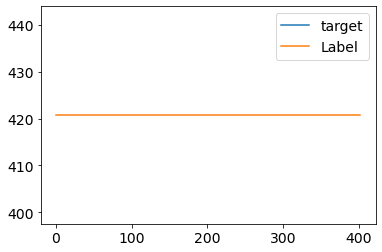

In [41]:
df_test15[df_test15['shoe_size_9']==1][['target','Label']].plot()


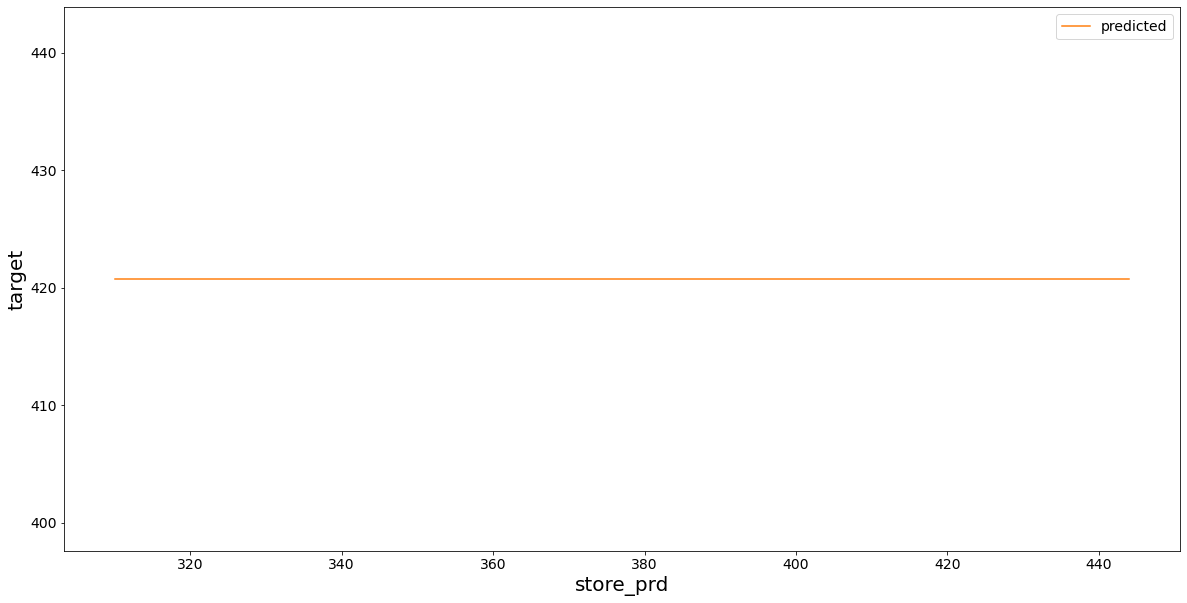

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax = sns.lineplot(data=train_win15[train_win15['shoe_size_11']==1], x='store_prd', y='target', label='train', ax=ax)
ax = sns.lineplot(data=df_test15[df_test15['shoe_size_11']==1], x='store_prd', y='Label', label='predicted', ax=ax)
ax = sns.lineplot(data=df_test15[df_test15['shoe_size_11']==1], x='store_prd', y='target', label='actual', ax=ax)